In [294]:
# 라이브러리 임포트
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

In [295]:
np.random.gumbel(0.0, 1.0, 5)

array([-0.71579207, -1.12019532, -0.69343705,  1.54153122, -0.15612533])

In [296]:
def p(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

In [297]:
s = 0.5

def q(x, m):
    return 1/s * np.exp(-(x-m)/s) * np.exp(-np.exp(-(x-m)/s))

In [298]:
x1 = 5

def func(N):
    x_list = [x1] # accept 된 x가 담길 리스트
    x_current = x1 # x_1 = 5

    for _ in range(N):
        x_star = np.random.gumbel(x_current, s) # x*를 gumbel(xi, s=0.5)에서 무작위로 선택
        a = p(x_star)*q(x_current, x_star)/p(x_current)/q(x_star, x_current) # acceptance 확률을 구하기 위한 변수
        acceptance_prob = min(1, a) # acceptance 확률 = min[1, {p(x*)p(x|x*)}/{p(x)/p(x*|x)}]
        if acceptance_prob == 1: # min값이 1일 때
            x_current = x_star # x*가 x값으로 accept 됨
        elif np.random.uniform(0,1) < acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 클 때
            x_current = x_star # x*가 x값으로 accept 됨
        elif np.random.uniform(0,1) >= acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 작거나 같을 때
            x_current = x_current # x*는 reject 되고 x는 이전 x를 그대로 accept
        x_list.append(x_current) # accpet 된 x를 x_list에 담음

    return x_list # N번 반복 후 리스트 반환

result = func(10000)

(array([  5.,   4.,   6.,  17.,  40.,  41.,  49.,  71.,  81., 146., 167.,
        197., 294., 300., 410., 536., 557., 634., 701., 681., 709., 661.,
        652., 585., 456., 373., 353., 236., 185., 194., 127., 107.,  97.,
         77.,  53.,  23.,  19.,  25.,  11.,  20.,  20.,  19.,  20.,  15.,
          8.,   9.,   1.,   4.,   3.,   2.]),
 array([-3.37704031, -3.20918989, -3.04133947, -2.87348906, -2.70563864,
        -2.53778822, -2.3699378 , -2.20208738, -2.03423696, -1.86638654,
        -1.69853613, -1.53068571, -1.36283529, -1.19498487, -1.02713445,
        -0.85928403, -0.69143361, -0.5235832 , -0.35573278, -0.18788236,
        -0.02003194,  0.14781848,  0.3156689 ,  0.48351932,  0.65136973,
         0.81922015,  0.98707057,  1.15492099,  1.32277141,  1.49062183,
         1.65847225,  1.82632267,  1.99417308,  2.1620235 ,  2.32987392,
         2.49772434,  2.66557476,  2.83342518,  3.0012756 ,  3.16912601,
         3.33697643,  3.50482685,  3.67267727,  3.84052769,  4.00837811,
 

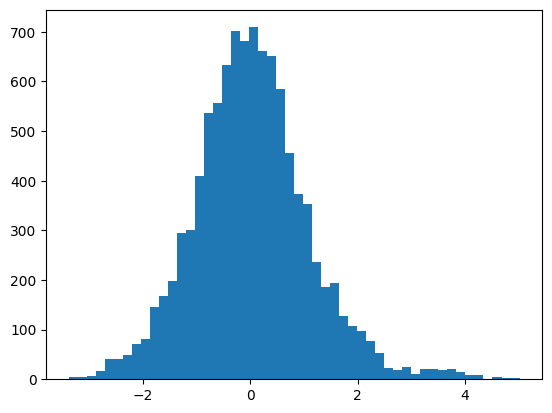

In [299]:
plt.hist(result, bins=50)

## 여기부터 04/18 내용

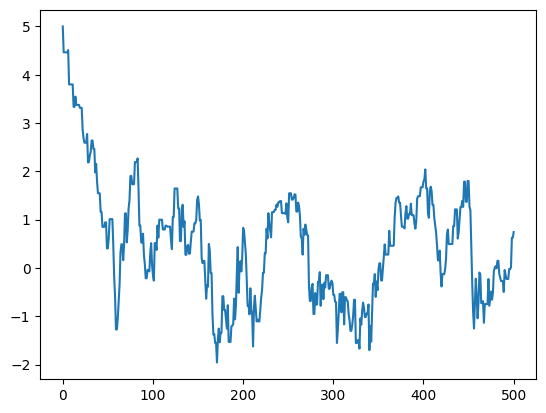

In [300]:
plt.plot(func(500)) # burn-in 되는 부분 확인 가능

In [301]:
# s = 100 변경

def q100(x, m):
    return 1/100 * np.exp(-(x-m)/100) * np.exp(-np.exp(-(x-m)/100))

def func100(N):
    x_list = [x1]
    x_current = x1

    for _ in range(N):
        x_star = np.random.gumbel(x_current, 100)
        a = p(x_star)*q100(x_current, x_star)/p(x_current)/q100(x_star, x_current)
        acceptance_prob = min(1, a)
        if acceptance_prob == 1:
            x_current = x_star
        elif np.random.uniform(0,1) < acceptance_prob:
            x_current = x_star
        elif np.random.uniform(0,1) >= acceptance_prob:
            x_current = x_current
        x_list.append(x_current)

    return x_list

result100 = func100(10000)

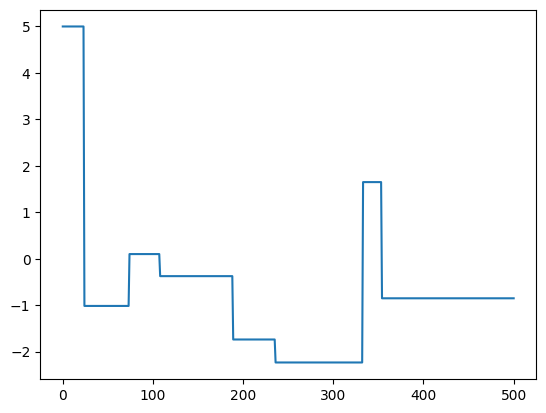

In [302]:
plt.plot(func100(500)) # 일자일 때 x가 reject 되어 유지됨

In [303]:
# 바로 accept 되는 x의 비율

def func2(N):
    x_list = [x1]
    x_current = x1
    count = 0

    for _ in range(N):
        x_star = np.random.gumbel(x_current, 100) # s = 100
        a = p(x_star)*q100(x_current, x_star)/p(x_current)/q100(x_star, x_current)
        acceptance_prob = min(1, a)
        if acceptance_prob == 1:
            x_current = x_star
            count += 1
        elif np.random.uniform(0,1) < acceptance_prob:
            x_current = x_star
            count += 1
        elif np.random.uniform(0,1) >= acceptance_prob:
            x_current = x_current
        x_list.append(x_current)

    return count

In [304]:
func2(10000)/10000

0.0121

In [305]:
# s = 0.1

def q01(x, m):
    return 1/0.1 * np.exp(-(x-m)/0.1) * np.exp(-np.exp(-(x-m)/0.1))

def func01(N):
    x_list = [x1]
    x_current = x1
    count = 0

    for _ in range(N):
        x_star = np.random.gumbel(x_current, 0.1)
        a = p(x_star)*q01(x_current, x_star)/p(x_current)/q01(x_star, x_current)
        acceptance_prob = min(1, a)
        if acceptance_prob == 1:
            x_current = x_star
            count += 1
        elif np.random.uniform(0,1) < acceptance_prob:
            x_current = x_star
            count += 1
        elif np.random.uniform(0,1) >= acceptance_prob:
            x_current = x_current
        x_list.append(x_current)

    return x_list, count

0.7294


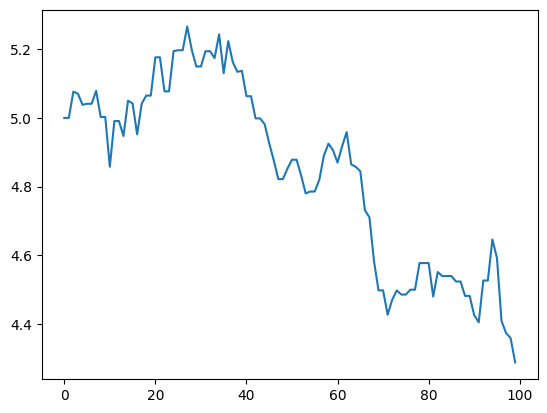

In [306]:
result01, count01 = func01(10000)
print(count01/10000)
plt.plot(result01[0:100]) # 앞쪽 100개만 확인해 보면 xlim:0~100, ylim:5~4쯤 됨

(array([  6.,   3.,  11.,  74., 104., 133., 181., 169., 239., 334., 307.,
        406., 429., 427., 621., 670., 712., 648., 591., 707., 569., 499.,
        413., 271., 192., 114., 173., 131.,  90., 107., 109.,  69.,  14.,
         16.,  31.,  32.,  11.,  22.,  45.,  57.,  41.,  46.,  45.,  32.,
         18.,  14.,   5.,  21.,  24.,  18.]),
 array([-2.36074256, -2.20820512, -2.05566769, -1.90313025, -1.75059282,
        -1.59805539, -1.44551795, -1.29298052, -1.14044308, -0.98790565,
        -0.83536821, -0.68283078, -0.53029334, -0.37775591, -0.22521847,
        -0.07268104,  0.0798564 ,  0.23239383,  0.38493127,  0.5374687 ,
         0.69000613,  0.84254357,  0.995081  ,  1.14761844,  1.30015587,
         1.45269331,  1.60523074,  1.75776818,  1.91030561,  2.06284305,
         2.21538048,  2.36791792,  2.52045535,  2.67299278,  2.82553022,
         2.97806765,  3.13060509,  3.28314252,  3.43567996,  3.58821739,
         3.74075483,  3.89329226,  4.0458297 ,  4.19836713,  4.35090457,
 

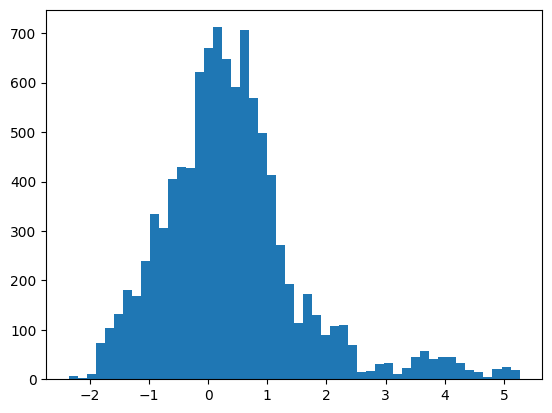

In [307]:
plt.hist(result01, bins=50)

In [308]:
from pandas import Series
S = Series(result01)
S.autocorr(3)

0.9961207293988575

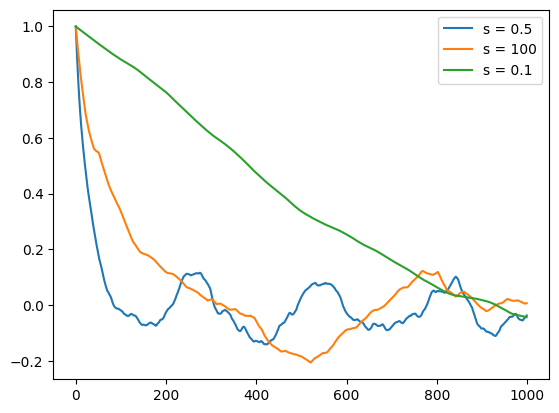

In [309]:
# 자기상관함수

S_list = [] # s = 0.5
S_list100 = [] # s = 100
S_list01 = [] # s = 0.1

for i in range(1000):
    S = Series(result)
    S_list.append(S.autocorr(i))

    S100 = Series(result100)
    S_list100.append(S100.autocorr(i))

    S01 = Series(result01)
    S_list01.append(S01.autocorr(i))

# plot
plt.plot(S_list, label='s = 0.5')
plt.plot(S_list100, label='s = 100')
plt.plot(S_list01, label='s = 0.1')
plt.legend()
plt.show()

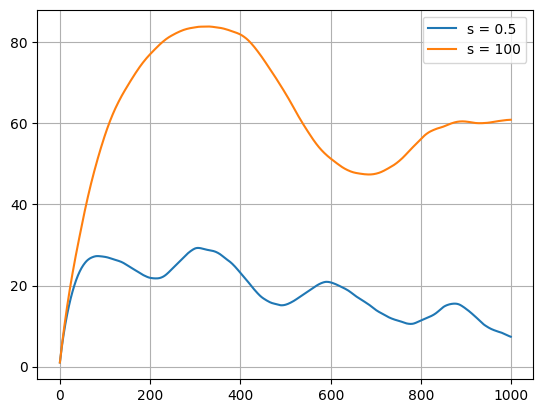

In [310]:
# 상관시간 타우

plt.plot(np.cumsum(S_list), label='s = 0.5') # 타우 ~ 20
plt.plot(np.cumsum(S_list100), label='s = 100') # 타우 ~ 80
# plt.plot(np.cumsum(S_list01), label='s = 0.1') # 타우 > 100?
plt.legend()
plt.grid()
plt.show()